In [1]:
import  sys; sys.path.append("../src")
from indirect import Indirect
from optimisation import conds
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# plot all nominal energy optimal trajectories
for cond in conds:
    fname = "../data/nominal_energy/" + str(cond) + ".npy"
    try:
        dv = np.load(fname)
    except:
        continue
    print(dv)
    seg = Indirect(*cond)
    tl, xl, ul = seg.propagate(*seg.decode(dv), 0, controls=True)
    seg.plot_traj(xl)
    seg.plot_timeline(tl, xl, ul)

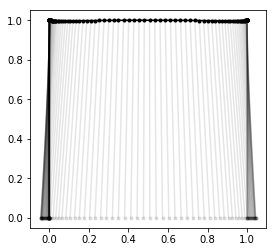

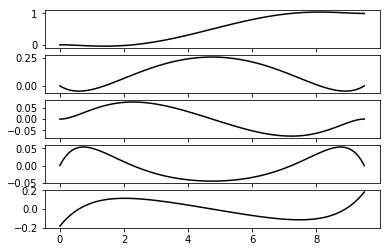

In [3]:
# sample nominal trajectory
x0 = [0,0,0,0]
xf = [1,0,0,0]
nedir = "../data/nominal_energy/"
dv = np.load(nedir + str((x0,xf)) + ".npy")
seg = Indirect(x0, xf)
tl, xl, ul = seg.propagate(*seg.decode(dv), 0, controls=True)
ax = seg.plot_traj(xl)
ax = seg.plot_timeline(tl, xl, ul)

In [ ]:
# slice trajectory
res = seg.random_walks(tl, xl, 0, verbose=True)

In [5]:
res = np.load("../data/energy_walks/" + str((x0, xf)) + ".npy") 

In [ ]:
trajs = np.hstack(res)

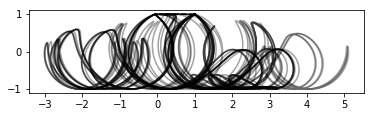

In [6]:
fig, ax = plt.subplots(1)
for traj in res:
    x = traj[:,1] + np.sin(traj[:,3])
    y = np.cos(traj[:,3])
    ax.plot(x, y, "k-", alpha=0.2)
seg.plot_traj(xl, ax=ax, arm=False, pts=False, interp=True)

In [ ]:
np.array(res)

In [ ]:
conds